In [16]:
import importlib
import numpy as np
#import readcol
import TCTriggerFunctions as TF
import matplotlib.pyplot as plt
import LCAnalyses as LCA
import LCPlot as LCP
import LCCall as LCC
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
importlib.reload(TF)
importlib.reload(LCA)
importlib.reload(LCP)
importlib.reload(LCC)

<module 'LCCall' from '/mnt/Secdrive/TSmain/Pip_test/trigger_codes_github/LCCall.py'>

In [17]:
k = "EC53"
mod_date = "191021"
datadir = '/mnt/Secdrive/TSmain/SERPM/'
output_dir = datadir + 'Results_'+mod_date+"/EC53/"

dates_K, mags_K, noises_K = LCC.EC53IR("UKIRT_K",imeunit="day",addLiverpool=0,timeunit="day")
dates_H, mags_H, noises_H = LCC.EC53IR("UKIRT_H",imeunit="day",addLiverpool=1,timeunit="day")
dates_J, mags_J, noises_J = LCC.EC53IR("UKIRT_J",imeunit="day",addLiverpool=0,timeunit="day")
dates_LH, mags_LH, noises_LH = LCC.EC53IR("Liverpool_H",imeunit="day",timeunit="day")
dates_850, fluxes_850, noises_850 = LCC.JCMTTRansientSource(k,'SERPM',"850",mod_date)
JDs_W1, mags_W1, noises_W1 = LCC.EC53IR("WISE_W1_avg")
JDs_W2, mags_W2, noises_W2 = LCC.EC53IR("WISE_W2_avg")
JDs_W3, mags_W3, noises_W3 = LCC.EC53IR("WISE_W3_avg")
JDs_W4, mags_W4, noises_W4 = LCC.EC53IR("WISE_W4_avg")
dates_HK, mags_HK, noises_HK = LCC.EC53IR("Hodapp_K")
JDs_K = [x-2400000.5 for x in dates_K]
JDs_H = [x-2400000.5 for x in dates_H]
JDs_J = [x-2400000.5 for x in dates_J]
JDs_LH = [x-2400000.5 for x in dates_LH]
JDs_850 = [x-2400000.5 for x in dates_850]
JDs_HK = [x-2400000.5 for x in dates_HK]
mags_850,mnoises_850 = LCC.Mag2flux("850",fluxes_850,noises_850, reverse=1)
fluxes_K,fnoises_K = LCC.Mag2flux("UKIRT_K",mags_K,noises_K)
#fluxes_HK, fnoise_HK = LCC.Mag2flux("Hodapp_K",mags_HK,noises_HK)
fluxes_LH,fnoises_LH = LCC.Mag2flux("Liverpool_H",mags_LH,noises_LH)
fluxes_H,fnoises_H = LCC.Mag2flux("UKIRT_H",mags_H,noises_H)
fluxes_J,fnoises_J = LCC.Mag2flux("UKIRT_J",mags_J,noises_J)
fluxes_W1,fnoises_W1 = LCC.Mag2flux("WISE_W1",mags_W1,noises_W1)
fluxes_W2,fnoises_W2 = LCC.Mag2flux("WISE_W2",mags_W2,noises_W2)
fluxes_W3,fnoises_W3 = LCC.Mag2flux("WISE_W3",mags_W3,noises_W3)
fluxes_W4,fnoises_W4 = LCC.Mag2flux("WISE_W4",mags_W4,noises_W4)

In [ ]:
print(np.where(JDs_850<np.array(JDs_LH).max()))
print(np.where(JDs_850>np.array(JDs_LH).min()))
print(len(JDs_850))

In [18]:
interval = 5
r_dates, r_mags_850, r_noises_850, acf = LCA.AutoCorrelation(JDs_850[25:49], mags_850[25:49],mnoises_850[25:49],interval=interval)
r_dates, r_fluxes_850, r_noises_850, acf = LCA.AutoCorrelation(JDs_850[25:49], fluxes_850[25:49],noises_850[25:49],interval=interval)
#r_dates, r_mags_H, r_noises_H = LCA.LCResample(JDs_H, mags_H,noises_H,r_dates) # to 41
r_dates, r_mags_LH, r_noises_LH = LCA.LCResample(JDs_LH, mags_LH,noises_LH,r_dates) # to 34
r_dates, r_fluxes_LH, r_fnoises_LH = LCA.LCResample(JDs_LH, fluxes_LH,fnoises_LH,r_dates) # to 34

#r_dates, r_mags_K, r_noises_K = LCA.LCResample(JDs_K, mags_K,noises_K,r_dates) # to 34

In [ ]:
len(r_mags_850)

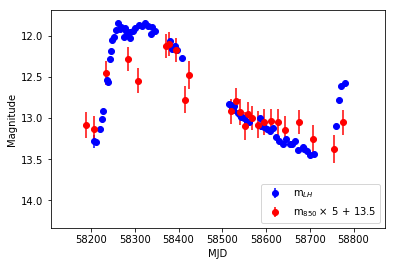

In [4]:
plt.close()
wl = 'LH'
#plt.scatter(r_dates,[x*5+14 for x in r_mags_850],color='red',label='m$_{850} \\times$ 5')
#plt.scatter(r_dates,np.array(r_mags_H),color='blue', label='m$_{'+wl+'}$')
plt.errorbar(JDs_LH,mags_LH,yerr=noises_LH,fmt='o',color='blue', label='m$_{'+wl+'}$')
plt.errorbar(JDs_850,[x*5+13.5 for x in mags_850],yerr=[x*5 for x in mnoises_850],fmt='o',color='red',label='m$_{850} \\times$ 5 + 13.5')

plt.xlim([r_dates.min()-100,r_dates.max()+100])
plt.ylabel("Magnitude")
plt.xlabel("MJD")
#plt.scatter(r_dates,np.array(r_mags_H),color='blue', label='H band')
plt.legend(loc='lower right')
#plt.title("Light curves of EC 53")
plt.gca().invert_yaxis()
plt.savefig(output_dir + k + '_LCs_'+str(interval)+ '_850&'+wl+'.pdf')

In [19]:

ccf = []
#n_mags_J = [x-np.mean(r_mags_J) for x in r_mags_J]
#n_mags_H = [x-np.mean(r_mags_H) for x in r_mags_H]
#n_mags_K = [x-np.mean(r_mags_K) for x in r_mags_K]
n_mags_LH = [x-np.mean(r_mags_LH) for x in r_mags_LH]
n_mags_850 = [x-np.mean(r_mags_850) for x in r_mags_850]
#ccf.append(np.correlate(n_mags_J,n_mags_850))
#for j in range(1,len(r_mags_850)):
    
#    ccf.append(np.correlate(n_mags_J,n_mags_850))

#ccff = np.correlate(n_mags_H,n_mags_850,'full')
#ccff = np.correlate(r_mags_J,r_mags_H,'full')
#ccff = ccff[:-int(len(n_mags_850))+1]
#cff = np.correlate(r_mags_J,[x*5+14 for x in r_mags_850])
#nccf = ccf/np.sum([x*y for x,y in zip(r_noises_850,r_noises_J)])

In [ ]:
plt.close()
plt.errorbar(r_dates,r_mags_LH,yerr=r_noises_LH,fmt='o',color='blue')
plt.errorbar(r_dates,[x*5+12 for x in n_mags_850],yerr=[x*5 for x in r_noises_850],fmt='o',color='red',label='m$_{850} \\times$ 5 + 13.5')
plt.gca().invert_yaxis()

In [6]:
ACF = []
#########################
n_mags_IR = n_mags_LH
r_mags_IR = r_mags_LH
r_noises_IR = r_noises_LH
wl = "LH"
########################
ACF.append(np.correlate(n_mags_IR,n_mags_850))
ACF[0] = ACF[0]#/np.sum([x**2 for x in n_mags_IR])
for j in range(1,int(len(n_mags_850))):
    i = len(n_mags_850)-j
    shifted = list(n_mags_850)[i:]+list(n_mags_850)[:i]
    #point_ACF = np.correlate(n_mags_IR,np.array(shifted))
    point_ACF = np.correlate(n_mags_IR[j:],n_mags_850[:-j])
    #point_ACF = point_ACF/np.sum([x*y for x,y in zip(n_mags_IR[j:],n_mags_850[:-j])])
    ACF.append(point_ACF)

ACF = np.array(ACF)

In [ ]:
np.correlate(n_mags_IR[1:],n_mags_850[:-1])

In [ ]:
len(n_mags_850)

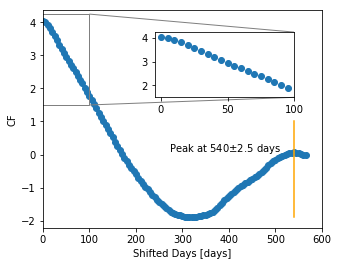

/mnt/Secdrive/TSmain/SERPM/Results_191021/EC53/EC53_CCF_5_850&LH_zoom.pdf


In [66]:
r_dates_plot = np.array([x-r_dates[0] for x in r_dates[0:int(len(r_dates))]])
fig, ax = plt.subplots(figsize=(5,4))
start_ind = int(400/interval)
j = start_ind + np.where(ACF[start_ind:int(len(r_dates))] == ACF[start_ind:int(len(r_dates))].max())[0]
j = j[0]
#j = 16
i = len(r_dates)-j

#ax[0].errorbar(r_dates[j:],n_mags_IR[:i],yerr=r_noises_IR[:i], fmt='o', color='orange')
#ax[0].errorbar([x-r_dates[0] for x in r_dates],n_mags_IR,yerr=r_noises_IR, fmt='o', color='orange')
#ax[0].errorbar([x-r_dates[0] for x in r_dates],[x*5 for x in n_mags_850],yerr=r_noises_850,fmt='o', color='firebrick')
#ax[0].invert_yaxis()
#ax[0].set(xlabel = 'Relative Dates [days]',ylabel = 'Flux [mJy]')
#ax[0].set(xlabel = 'Relative Dates [days]',ylabel = 'Magnitudes [mag]')
ax.scatter(r_dates_plot,ACF)
ax.plot([j*interval,j*interval],[ACF.min(),ACF.max()/4],color="orange")
ax.annotate("Peak at {0:3.0f}$\pm${1:2.1f} days".format(j*interval,interval/2),xy=[0.5,0.43], xycoords="figure fraction")
ax.set(xlabel = 'Shifted Days [days]', ylabel = 'CF')
ax.set_xlim([0,600])
#ax[1].set_ylim([2,4.5])
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.4, 0.6, 0.5, 0.3])
ax2.set_axes_locator(ip)
ax2.scatter(r_dates_plot[np.where(r_dates_plot<100)],ACF[np.where(r_dates_plot<100)])
ax2.set_ylim([1.5,ACF.max()+0.2])
mark_inset(ax, ax2, loc1=1, loc2=4, fc="none",ec="0.5")
#ax2.set(xlabel = 'Shifted Days [days]', ylabel = 'CF')

datadir = "/mnt/Secdrive/TSmain/SERPM"
output_dir = datadir+"/Results_"+mod_date+"/EC53/"
output = output_dir+ "EC53" + '_CCF_'+str(interval)+ '_850&'+wl+'_zoom.pdf'
plt.show()
fig.savefig(output)
print(output)

In [27]:
r_dates_plot[3]

15.0

In [ ]:
ACF = []
#########################
n_mags_IR = [x-np.mean(r_fluxes_LH) for x in r_fluxes_LH]
n_mags_850 = [x-np.mean(r_fluxes_850) for x in r_fluxes_850]
#r_fluxes_IR = r_fluxes_LH
r_fnoises_IR = r_fnoises_LH
wl = "LH"
########################
ACF.append(np.correlate(n_mags_IR,n_mags_850))
ACF[0] = ACF[0]#/np.sum([x**2 for x in n_mags_IR])
for j in range(1,int(len(n_mags_850))):
    i = len(n_mags_850)-j
    shifted = list(n_mags_850)[i:]+list(n_mags_850)[:i]
    #point_ACF = np.correlate(n_mags_IR,np.array(shifted))
    point_ACF = np.correlate(n_mags_IR[j:],n_mags_850[:-j])
    #point_ACF = point_ACF/np.sum([x*y for x,y in zip(n_mags_IR[j:],n_mags_850[:-j])])
    ACF.append(point_ACF)

ACF = np.array(ACF)

In [ ]:
r_dates_plot = [x-r_dates[0] for x in r_dates[0:int(len(r_dates))]]
fig, ax = plt.subplots(2,1,figsize=(5,8))
start_ind = int(400/interval)
j = start_ind + np.where(ACF[start_ind:int(len(r_dates))] == ACF[start_ind:int(len(r_dates))].max())[0]
j = j[0]
#j = 16
i = len(r_dates)-j

#ax[0].errorbar(r_dates[j:],n_mags_IR[:i],yerr=r_noises_IR[:i], fmt='o', color='orange')
ax[0].errorbar(r_dates,n_mags_IR,yerr=r_fnoises_IR, fmt='o', color='orange')
ax[0].errorbar(r_dates,n_mags_850,yerr=r_noises_850,fmt='o', color='firebrick')
#ax[0].invert_yaxis()
#ax[0].set(xlabel = 'Relative Dates [days]',ylabel = 'Flux [mJy]')
ax[0].set(xlabel = 'Relative Dates [days]',ylabel = 'Magnitudes [mag]')
ax[1].scatter(r_dates_plot,ACF)
ax[1].plot([j*interval,j*interval],[ACF.min(),ACF.max()],color="orange")
ax[1].annotate("Peak at {0:3.0f}$\pm${1:2.0f} days".format(j*interval,interval/2),xy=[0.40,0.3], xycoords="figure fraction")
ax[1].set(xlabel = 'Shifted Days [days]', ylabel = 'CF')
#ax[1].set_xlim([0,100])
#ax[1].set_ylim([0.02,0.045])

datadir = "/mnt/Secdrive/TSmain/SERPM"
output_dir = datadir+"/Results_191021/"
output = output_dir+ "EC53/" + 'EC53_CCF_'+str(interval)+ '_f850&'+wl+'_whole.pdf'
plt.savefig(output)
